# Number of Agents
Metrics varying according to the number of D2D pairs.

In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sys_simulator.general import load_with_pickle, sns_confidence_interval_plot, power_to_db, db_to_power
from copy import deepcopy
import os

In [3]:
EXP_NAME = 'num_agents'

# ddpg
# ALGO_NAME = 'ddpg'
# filepath = "/home/lucas/dev/sys-simulator-2/data/ddpg/evaluate3/20210515-113137/log.pickle"
filepath = "/home/lucas/dev/sys-simulator-2/data/ddpg/evaluate3/20210610-132752/log.pickle"
ddpg_data = load_with_pickle(filepath)
# dql
# ALGO_NAME = 'dql'
# filepath = "/home/lucas/dev/sys-simulator-2/data/dql/evaluate3/20210516-125837/log.pickle"
filepath = "/home/lucas/dev/sys-simulator-2/data/dql/evaluate3/20210610-135335/log.pickle"
dql_data = load_with_pickle(filepath)
# a2c
# ALGO_NAME = 'a2c'
filepath = "/home/lucas/dev/sys-simulator-2/data/a2c/evaluate3/20210511-220757/log.pickle"
a2c_data = load_with_pickle(filepath)
# discrete random
filepath = "/home/lucas/dev/sys-simulator-2/data/benchmark/script5/20210523-231548/log.pickle"
discrete_data = load_with_pickle(filepath)
# continuous random
filepath = "/home/lucas/dev/sys-simulator-2/data/benchmark/script6/20210611-095203/log.pickle"
continuous_data = load_with_pickle(filepath)
# output path
OUTPUT_PATH = f'/home/lucas/dev/sys-simulator-2/figs/{EXP_NAME}'

# Aux functions

In [4]:
def unpack1(data, key):
    x = []
    y = []
    for ind, i in enumerate(data):
        y.append(i[key])
        x.append((ind+1)*np.ones(len(i[key])))
    x = np.array(x)
    y = np.array(y)
    x = x.reshape(-1)
    y = y.reshape(-1)
    return x, y


def unpack2(data, key):
    y = []
    x = []
    for ind, i in enumerate(data):
        aux_y = np.array(i[key]).reshape(-1)
        aux_x = np.ones(len(aux_y)) * (ind+1)
        y += aux_y.tolist()
        x += aux_x.tolist()    
    return x, y


def unpack3(data, key):
    x = []
    y = []
    for ind, i in enumerate(data):
        y.append(i[key])
        x.append((ind+1)*np.ones(len(i[key])))
    x = np.array(x)
    y = np.array(y)    
    return x, y


def unpack4(data, key):
    x = []
    y = []
    for ind, i in enumerate(data):
        aux = np.array(i[key]).reshape(-1).tolist()
        y += aux
        aux_x = (ind+1)*np.ones(len(aux))
        x += aux_x.tolist()
    x = np.array(x)
    y = np.array(y)    
    return x, y


def calc_speff(x):
    x = np.array(x)
    y = np.log2(1+db_to_power(x))
    return y


def total_speffs(data):
    key1 = 'd2d_sinrs'
    key2 = 'mue_sinrs'
    x = []
    y = []
    for ind, i in enumerate(data):
        aux = np.log2(1 + db_to_power(np.array(i[key1]).sum(axis=1)))
        aux += np.log2(1 + db_to_power(np.array(i[key2])))
        aux = aux.reshape(-1).tolist()
        y += aux
        aux_x = (ind+1)*np.ones(len(aux))
        x += aux_x.tolist()        
    return x, y

# Fonts config

In [5]:
x_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
y_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
ticks_font = {
    'fontfamily': 'serif',
    'fontsize': 13
}
legends_font = {
    'size': 13,
    'family': 'serif'
}

# MUE SINR

/home/lucas/dev/sys-simulator-2/figs/num_agents/mue-sinrs-algos.svg


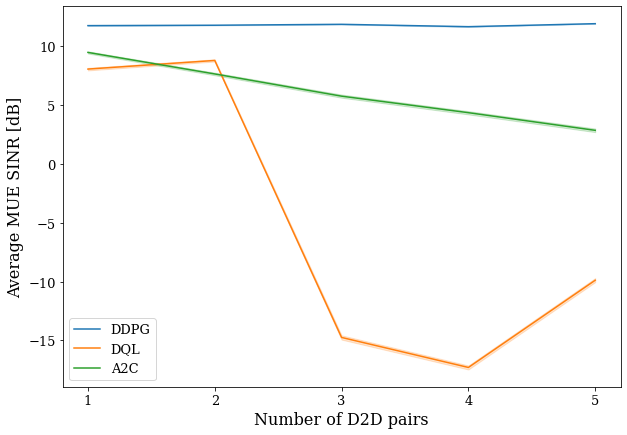

In [6]:
# data
key = 'mue_sinrs'
x, y_ddpg = unpack1(ddpg_data, key)
_, y_dql = unpack1(dql_data, key)
_, y_a2c = unpack1(a2c_data, key)
# _, y_discrete_data = unpack1(discrete_data, key)
# _, y_continuous_data = unpack1(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average MUE SINR [dB]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
# sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
# sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'mue-sinrs-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

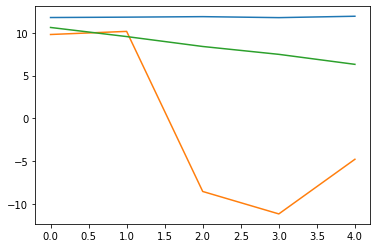

In [7]:
# data
key = 'mue_sinrs'
x, y_ddpg = unpack3(ddpg_data, key)
_, y_dql = unpack3(dql_data, key)
_, y_a2c = unpack3(a2c_data, key)
y_ddpg = power_to_db(db_to_power(y_ddpg).mean(axis=1))
y_dql = power_to_db(db_to_power(y_dql).mean(axis=1))
y_a2c = power_to_db(db_to_power(y_a2c).mean(axis=1))
plt.plot(y_ddpg)
plt.plot(y_dql)
plt.plot(y_a2c)

# MUE availability

/home/lucas/dev/sys-simulator-2/figs/num_agents/mue-availability-algos.svg


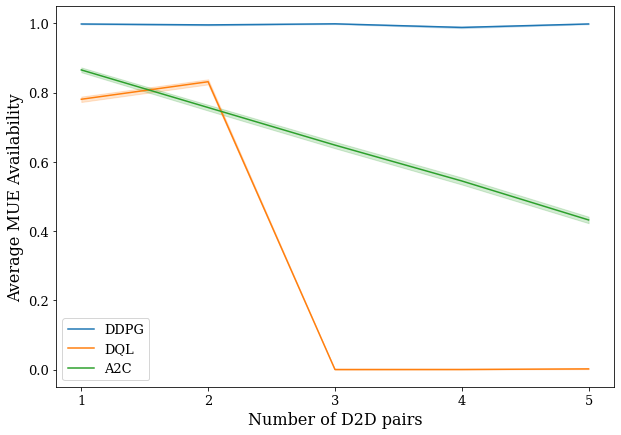

In [8]:
# data
key = 'mue_availability'
x, y_ddpg = unpack1(ddpg_data, key)
_, y_dql = unpack1(dql_data, key)
_, y_a2c = unpack1(a2c_data, key)
# _, y_discrete_data = unpack1(discrete_data, key)
# _, y_continuous_data = unpack1(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average MUE Availability', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
# sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
# sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'mue-availability-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# D2D SINRs

In [9]:
a2c_data[0].keys()

dict_keys(['rewards', 'mue_sinrs', 'd2d_sinrs', 'mue_availability'])

/home/lucas/dev/sys-simulator-2/figs/num_agents/d2d-sinrs-algos.svg


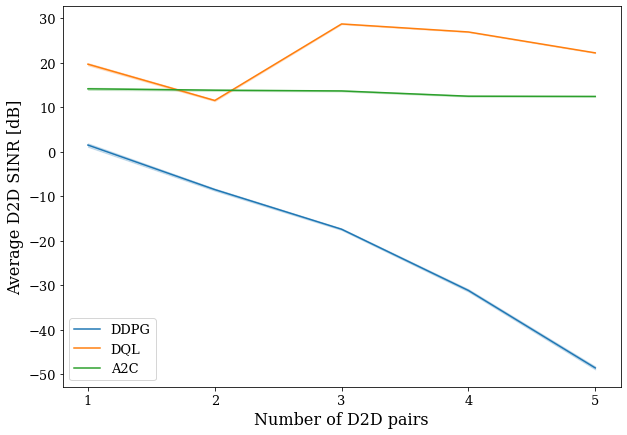

In [10]:
# data
key = 'd2d_sinrs'
x, y_ddpg = unpack2(ddpg_data, key)
_, y_dql = unpack2(dql_data, key)
_, y_a2c = unpack2(a2c_data, key)
# _, y_discrete_data = unpack2(discrete_data, key)
# _, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average D2D SINR [dB]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
# sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
# sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'd2d-sinrs-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# Rewards

/home/lucas/dev/sys-simulator-2/figs/num_agents/d2d-rewards-algos.svg


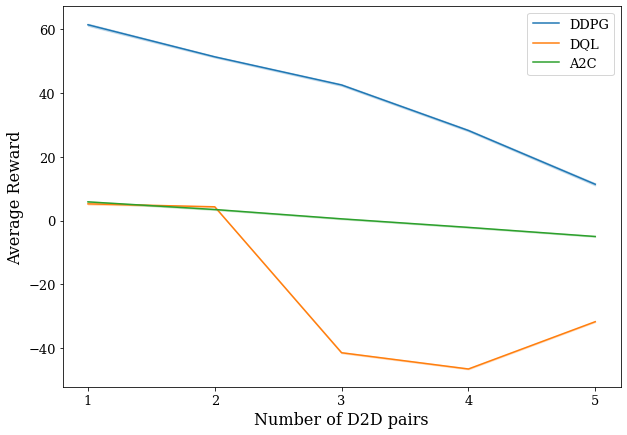

In [11]:
# data
# gambiarra ddpg
key = 'rewards'
x_ddpg, y_ddpg = unpack1(ddpg_data, key)
x_dql, y_dql = unpack2(dql_data, key)
x_a2c, y_a2c = unpack2(a2c_data, key)
# _, y_discrete_data = unpack2(discrete_data, key)
# _, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average Reward', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x_ddpg, y=y_ddpg, label='DDPG')
sns.lineplot(x=x_dql, y=y_dql, label='DQL')
sns.lineplot(x=x_a2c, y=y_a2c, label='A2C')
# sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
# sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'd2d-rewards-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# Benchmarks

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-mue-sinrs-algos.svg


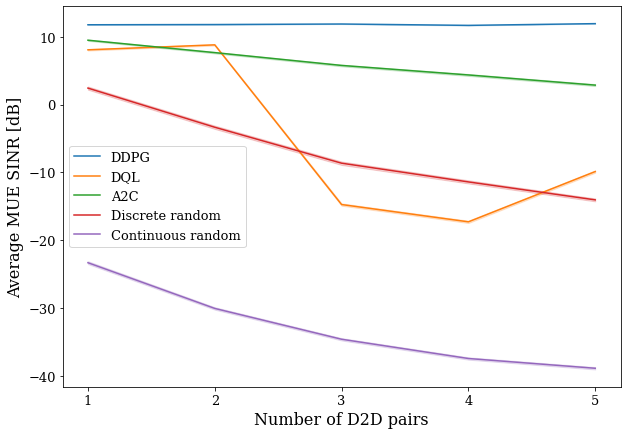

In [12]:
# data
key = 'mue_sinrs'
x, y_ddpg = unpack1(ddpg_data, key)
_, y_dql = unpack1(dql_data, key)
_, y_a2c = unpack1(a2c_data, key)
_, y_discrete_data = unpack1(discrete_data, key)
_, y_continuous_data = unpack1(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average MUE SINR [dB]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x, y=y_ddpg, label='DDPG')
sns.lineplot(x=x, y=y_dql, label='DQL')
sns.lineplot(x=x, y=y_a2c, label='A2C')
sns.lineplot(x=x, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-mue-sinrs-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# MUE availability

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-mue-availability-algos.svg


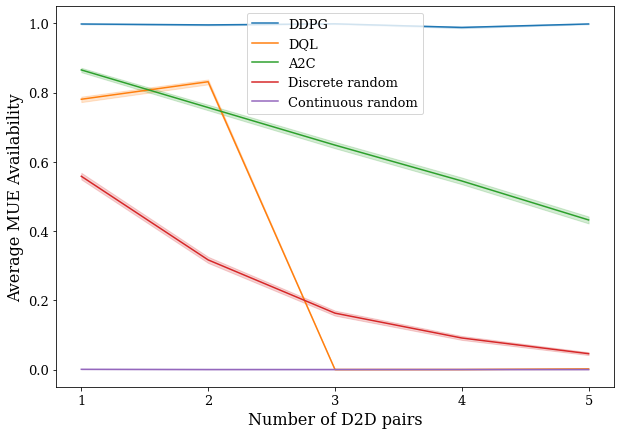

In [13]:
# data
key = 'mue_availability'
x_ddpg, y_ddpg = unpack1(ddpg_data, key)
x_dql, y_dql = unpack1(dql_data, key)
x_a2c, y_a2c = unpack1(a2c_data, key)
x_discrete_data, y_discrete_data = unpack1(discrete_data, key)
x_continuous_data, y_continuous_data = unpack1(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average MUE Availability', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x_ddpg, y=y_ddpg, label='DDPG')
sns.lineplot(x=x_dql, y=y_dql, label='DQL')
sns.lineplot(x=x_a2c, y=y_a2c, label='A2C')
sns.lineplot(x=x_discrete_data, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x_continuous_data, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-mue-availability-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

# D2D SINRs

In [14]:
a2c_data[0].keys()

dict_keys(['rewards', 'mue_sinrs', 'd2d_sinrs', 'mue_availability'])

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-d2d-sinrs-algos.svg


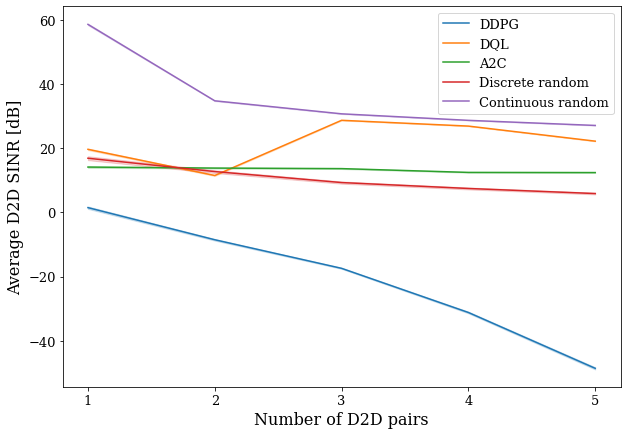

In [15]:
# data
key = 'd2d_sinrs'
x_ddpg, y_ddpg = unpack2(ddpg_data, key)
x_dql, y_dql = unpack2(dql_data, key)
x_a2c, y_a2c = unpack2(a2c_data, key)
x_discrete_data, y_discrete_data = unpack2(discrete_data, key)
x_continuous_data, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average D2D SINR [dB]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x_ddpg, y=y_ddpg, label='DDPG')
sns.lineplot(x=x_dql, y=y_dql, label='DQL')
sns.lineplot(x=x_a2c, y=y_a2c, label='A2C')
sns.lineplot(x=x_discrete_data, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x_continuous_data, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-d2d-sinrs-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

## Spectral efficiencies

In [16]:
len(x_ddpg)

150000

In [17]:
len(y_ddpg)

150000

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-d2d-speffs.svg


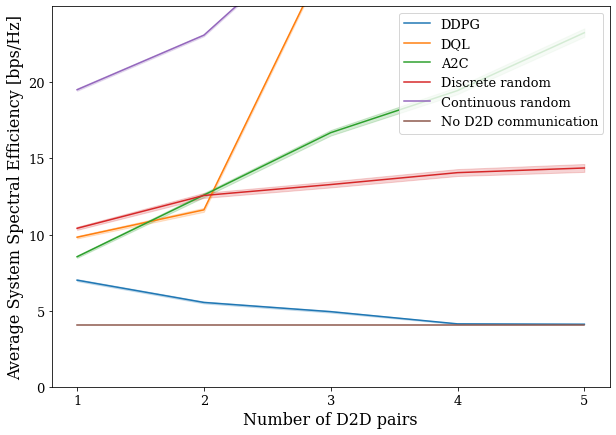

In [18]:
# data
key = 'd2d_sinrs'
x_ddpg, y_ddpg = total_speffs(ddpg_data)
x_dql, y_dql = total_speffs(dql_data)
x_a2c, y_a2c = total_speffs(a2c_data)
x_discrete_data, y_discrete_data = total_speffs(discrete_data)
x_continuous_data, y_continuous_data = total_speffs(continuous_data)
x_nod2d, y_nod2d = range(6)[1:], np.log2(1+db_to_power(12*np.ones(5)))
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average System Spectral Efficiency [bps/Hz]', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks([0, 5, 10, 15, 20], **ticks_font)
plt.ylim([0, 25])
# plot
sns.lineplot(x=x_ddpg, y=y_ddpg, label='DDPG')
sns.lineplot(x=x_dql, y=y_dql, label='DQL')
sns.lineplot(x=x_a2c, y=y_a2c, label='A2C')
sns.lineplot(x=x_discrete_data, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x_continuous_data, y=y_continuous_data, label='Continuous random')
sns.lineplot(x=x_nod2d, y=y_nod2d, label='No D2D communication')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-d2d-speffs'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

In [19]:
np.log2(1+10**1.2)

4.074585234905427

In [20]:
np.mean(db_to_power(np.array(ddpg_data[0]['d2d_sinrs'])))

7284.043739823643

In [21]:
np.array(ddpg_data[0]['d2d_sinrs']).max()

67.07534298090312

In [22]:
np.max(db_to_power(np.array(ddpg_data[0]['d2d_sinrs'])))

5099578.695358514

In [23]:
np.std(db_to_power(np.array(ddpg_data[0]['d2d_sinrs'])))

121842.38750967466

In [24]:
np.array(ddpg_data[0]['d2d_sinrs']).mean()

1.472522615142982

In [25]:
np.log2(1 + db_to_power(np.array(ddpg_data[0]['d2d_sinrs'])).sum(axis=1)).mean()

3.0073761716484992

In [26]:
(np.log2(1 + db_to_power(np.array(ddpg_data[0]['d2d_sinrs'])).sum(axis=1)) + np.log2(1 + db_to_power(np.array(ddpg_data[0]['mue_sinrs'])))).mean()

7.006996338197503

In [27]:
np.log2(1 + db_to_power(np.mean(ddpg_data[0]['mue_sinrs'])))

3.9983747447495137

In [28]:
(np.log2(1+db_to_power(np.array(ddpg_data[0]['d2d_sinrs']))).reshape(-1) + np.log2(1+db_to_power(np.array(ddpg_data[0]['mue_sinrs']))).reshape(-1)).mean()

7.006996338197503

# Rewards

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-d2d-rewards-algos.svg


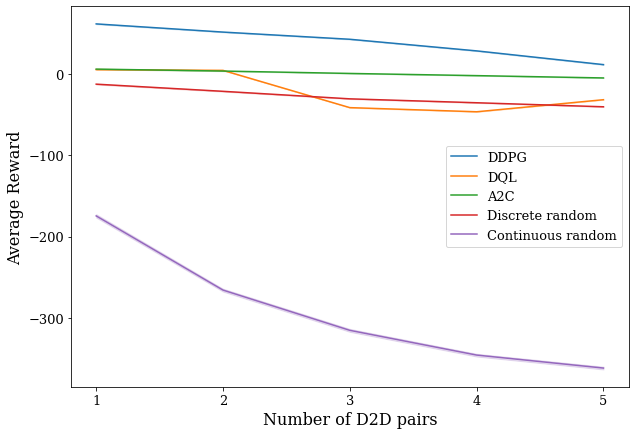

In [30]:
# data
# gambiarra ddpg
key = 'rewards'
x_ddpg, y_ddpg = unpack1(ddpg_data, key)
x_dql, y_dql = unpack2(dql_data, key)
x_a2c, y_a2c = unpack2(a2c_data, key)
x_discrete_data, y_discrete_data = unpack2(discrete_data, key)
x_continuous_data, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average Reward', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
# plot
sns.lineplot(x=x_ddpg, y=y_ddpg, label='DDPG')
sns.lineplot(x=x_dql, y=y_dql, label='DQL')
sns.lineplot(x=x_a2c, y=y_a2c, label='A2C')
sns.lineplot(x=x_discrete_data, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x_continuous_data, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-d2d-rewards-algos'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()

/home/lucas/dev/sys-simulator-2/figs/num_agents/benchmark-d2d-rewards-algos-zoom.svg


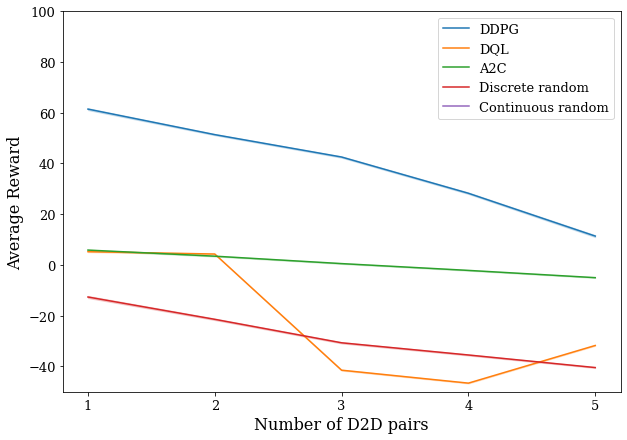

In [31]:
# data
# gambiarra ddpg
key = 'rewards'
x_ddpg, y_ddpg = unpack1(ddpg_data, key)
x_dql, y_dql = unpack2(dql_data, key)
x_a2c, y_a2c = unpack2(a2c_data, key)
x_discrete_data, y_discrete_data = unpack2(discrete_data, key)
x_continuous_data, y_continuous_data = unpack2(continuous_data, key)
# setup
plt.figure(figsize=(10,7))
plt.xlabel('Number of D2D pairs', fontdict=x_font)
plt.ylabel('Average Reward', fontdict=y_font)
plt.xticks([1, 2, 3, 4, 5], **ticks_font)
plt.yticks(**ticks_font)
plt.ylim([-50, 100])
# plot
sns.lineplot(x=x_ddpg, y=y_ddpg, label='DDPG')
sns.lineplot(x=x_dql, y=y_dql, label='DQL')
sns.lineplot(x=x_a2c, y=y_a2c, label='A2C')
sns.lineplot(x=x_discrete_data, y=y_discrete_data, label='Discrete random')
sns.lineplot(x=x_continuous_data, y=y_continuous_data, label='Continuous random')
plt.legend(prop=legends_font)
# save fig
fig_name = 'benchmark-d2d-rewards-algos-zoom'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
print(svg_path)
plt.show()